In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exercise_overview_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/com.samsung.health.exercise.2024110708.csv'

exercise_overview = pd.read_csv(exercise_overview_path, index_col=False)

In [7]:
single_exercise_location = exercise_overview['live_data'][0]

file_path = f"/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/jsons/com.samsung.health.exercise/{single_exercise_location}.json"

single_exercise = pd.read_json(file_path)

In [8]:
single_exercise

,start_time,speed,heart_rate
0,2024-04-26 20:54:25.725,1.338654,NaN
1,2024-04-26 20:55:25.724,1.145645,NaN
2,2024-04-26 20:56:25.724,1.345484,NaN
3,2024-04-26 20:57:25.662,NaN,87.0
4,2024-04-26 20:57:25.724,1.412211,NaN
...,...,...,...
83,2024-04-26 21:08:40.664,NaN,98.0
84,2024-04-26 21:08:50.665,NaN,98.0
85,2024-04-26 21:09:00.666,NaN,93.0
86,2024-04-26 21:09:10.666,NaN,94.0


In [9]:
# Change datatime column into a datetype field
single_exercise['start_time'] = pd.to_datetime(single_exercise['start_time'])

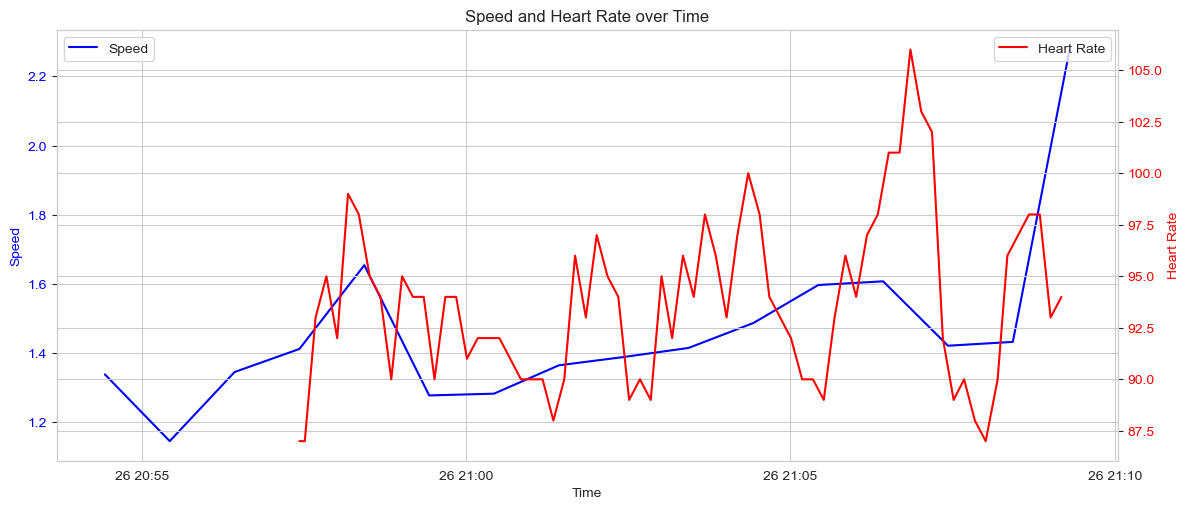

In [10]:
time_variable = single_exercise['start_time']
speed = single_exercise['speed']
heart_rate = single_exercise['heart_rate']

sns.set_style("whitegrid")

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot speed on the primary y-axis (left)
sns.lineplot(x=time_variable, y=speed, label='Speed', color='blue', ax=ax1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis (right)
ax2 = ax1.twinx()

# Plot heart rate on the secondary y-axis
sns.lineplot(x=time_variable, y=heart_rate, label='Heart Rate', color='red', ax=ax2)
ax2.set_ylabel('Heart Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.tight_layout()  # Adjust the layout to make room for both y-axis labels
plt.title('Speed and Heart Rate over Time')

# Show the plot
plt.show()